In [151]:
import pandas as pd
import numpy as np
import docx
import textract
import os
import re
import collections

In [54]:
directory = "./Resumes"
text = {}
data = []
Category = []
fileName = []
n = 0
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        if f.lower().endswith(".docx"):
            #doc = aw.Document(f)
        #else:
            n = n+1
            t1 = textract.process(f)
            data.append(t1)
            Category.append("React Developer")
            fileName.append(filename)

text = {"data": data, "Category": Category, "File": fileName}

t2 = pd.DataFrame(text)
t2

,data,Category,File
0,b'Name: Ravali P \n\n\n\n ...,React Developer,Internship_Ravali_Musquare Technologies (1).docx
1,b'SUSOVAN BAG \n\nSeeking a challenging ...,React Developer,Internship_Susovan Bag_Musquare Technologies.docx
2,b'Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREE...,React Developer,React Developer_Deepakreddy.docx
3,b'HARIPRIYA BATTINA \n\nExperience as UI Devel...,React Developer,React Developer_Haripriya.docx
4,b'KAMALAKAR REDDY. A \n\nLinked In: https://ww...,React Developer,React Developer_Kamalakar Reddy.docx
5,b'Naveen Sadhu\n\n\n\n\n\nTitle: software deve...,React Developer,React Developer_Naveen sadhu.docx
6,b'PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertis...,React Developer,React Developer_Pragnya.docx
7,"b""SARALA MADASU\n\nSARALA MADASU\n\n\xee\xa5\x...",React Developer,React Developer_Sarala Madasu-converted.docx
8,"b""Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2...",React Developer,React Developer_Thirupathiamma.docx
9,b'Ui-Developer/ React JS Developer \n\nNAME: K...,React Developer,React Dev_Krishna Kanth.docx


In [55]:
t2["name"] = t2["File"].str.replace('[^a-zA-Z ]', '')

eliminate = ["Internship","Technologies","docx","converted","Musquare","React","JS","Developer","Dev","Reactjs","js"]
for i in eliminate:
    t2["name"] = t2["name"].str.replace(i,"")

C:\Users\marang\AppData\Local\Temp\ipykernel_12668\3419712923.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  t2["name"] = t2["File"].str.replace('[^a-zA-Z ]', '')


In [56]:
t2

,data,Category,File,name
0,b'Name: Ravali P \n\n\n\n ...,React Developer,Internship_Ravali_Musquare Technologies (1).docx,Ravali
1,b'SUSOVAN BAG \n\nSeeking a challenging ...,React Developer,Internship_Susovan Bag_Musquare Technologies.docx,Susovan Bag
2,b'Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREE...,React Developer,React Developer_Deepakreddy.docx,Deepakreddy
3,b'HARIPRIYA BATTINA \n\nExperience as UI Devel...,React Developer,React Developer_Haripriya.docx,Haripriya
4,b'KAMALAKAR REDDY. A \n\nLinked In: https://ww...,React Developer,React Developer_Kamalakar Reddy.docx,Kamalakar Reddy
5,b'Naveen Sadhu\n\n\n\n\n\nTitle: software deve...,React Developer,React Developer_Naveen sadhu.docx,Naveen sadhu
6,b'PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertis...,React Developer,React Developer_Pragnya.docx,Pragnya
7,"b""SARALA MADASU\n\nSARALA MADASU\n\n\xee\xa5\x...",React Developer,React Developer_Sarala Madasu-converted.docx,Sarala Madasu
8,"b""Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2...",React Developer,React Developer_Thirupathiamma.docx,Thirupathiamma
9,b'Ui-Developer/ React JS Developer \n\nNAME: K...,React Developer,React Dev_Krishna Kanth.docx,Krishna Kanth


In [5]:
# t2["Emails"] = t2["data"].str.decode('utf-8').str.findall('(\S+@\S+)')
# #emails = re.findall(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", text)
# t2["data"] = t2["data"].str.decode('utf-8').str.replace('\\n',' ')
# t2

In [6]:
labels = t2.data.values.tolist()
str1 = collections.defaultdict(int)
for sub in labels:
    for wrd in sub.split():
        str1[wrd] += 1
str1

defaultdict(int,
            {b'Name:': 1,
             b'Ravali': 2,
             b'P': 4,
             b'Curriculum': 1,
             b'Vitae': 1,
             b'Specialization:': 1,
             b'BE': 2,
             b'(computer': 1,
             b'science': 3,
             b'and': 231,
             b'Engg)': 1,
             b'C': 7,
             b'A': 13,
             b'R': 6,
             b'EE': 2,
             b'OB': 2,
             b'JE': 2,
             b'CT': 2,
             b'I': 32,
             b'V': 2,
             b'E': 13,
             b'To': 4,
             b'utilize': 5,
             b'my': 28,
             b'technical': 4,
             b'skills': 17,
             b'for': 75,
             b'achieving': 1,
             b'the': 169,
             b'target': 2,
             b'developing': 15,
             b'best': 15,
             b'performance': 3,
             b'in': 176,
             b'organization.': 2,
             b'D': 4,
             b'U': 2,
             b'T': 4,

In [7]:
str2 = []
for i in str1:
    if str1[i] > 1:
        str2.append(i)
        
str2

[b'Ravali',
 b'P',
 b'BE',
 b'science',
 b'and',
 b'C',
 b'A',
 b'R',
 b'EE',
 b'OB',
 b'JE',
 b'CT',
 b'I',
 b'V',
 b'E',
 b'To',
 b'utilize',
 b'my',
 b'technical',
 b'skills',
 b'for',
 b'the',
 b'target',
 b'developing',
 b'best',
 b'performance',
 b'in',
 b'organization.',
 b'D',
 b'U',
 b'T',
 b'ION',
 b'Board',
 b'CGPA',
 b'Year',
 b'of',
 b'Passing',
 b'S',
 b'J',
 b'B',
 b'Institute',
 b'technology',
 b'2021',
 b'Diploma',
 b'Karnataka',
 b'Technical',
 b'Bengaluru',
 b'2017',
 b'high',
 b'school',
 b'Secondary',
 b'Education',
 b'2011',
 b'SKILLS',
 b'Strong',
 b'knowledge',
 b'concepts.',
 b'Extensive',
 b'Testing.',
 b'Good',
 b'Functional',
 b'testing,',
 b'Integration',
 b'Extreme',
 b'Knowledge',
 b'on',
 b'System',
 b'Testing',
 b'testing.',
 b'Test',
 b'cases',
 b'compatibility',
 b'QL',
 b'K',
 b'LL',
 b'Goo',
 b'd',
 b'k',
 b'n',
 b'o',
 b'w',
 b'l',
 b'e',
 b'g',
 b'RD',
 b'M',
 b'c',
 b'p',
 b't',
 b'.',
 b'G',
 b'1',
 b'oo',
 b'u',
 b'r',
 b's',
 b'a',
 b'i',
 b'F

In [8]:
directory = "./Resumes/Peoplesoft resumes/"
text = {}
data = []
Category = []
fileName = []
n = 0
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        if f.lower().endswith(".docx"):
            #doc = aw.Document(f)
        #else:
            n = n+1
            t1 = textract.process(f)
            data.append(t1)
            Category.append("PeopleSoft")
            fileName.append(filename)

text = {"data": data, "Category": Category, "File": fileName}

t3 = pd.DataFrame(text)
t3

,data,Category,File
0,b'Anubhav Kumar Singh\t\t\n\n\n\nCore Competen...,PeopleSoft,Peoplesoft Admin_AnubhavSingh.docx
1,b'Classification: Internal\n\nClassification: ...,PeopleSoft,Peoplesoft Admin_Murali.docx
2,"b""SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n...",PeopleSoft,Peoplesoft Admin_SirazuddinMohammad.docx
3,"b""PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCar...",PeopleSoft,Peoplesoft Admin_Varkala Vikas.docx
4,b'PeopleSoft Administration\n\n \n\nVivekanand...,PeopleSoft,PeopleSoft DBA_Vivekanand Sayana.docx
5,b'Hari Narayana \t\t \n\n\t\n\n\n...,PeopleSoft,Peoplesoft FSCM_HariNarayana.docx
6,b'Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,Peoplesoft FSCM_Murali.docx
7,b'Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\...,PeopleSoft,Peoplesoft FSCM_PriyabrataHota.docx
8,b'Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nS...,PeopleSoft,Peoplesoft FSCM_SUJATHA.docx
9,"b""C O N T A C T :\n\n\n\nAddress: Manyata Tech...",PeopleSoft,Resume_Subha Santosh_Peoplesoft FSCM.docx


In [9]:
t3["name"] = t3["File"].str.replace('[^a-zA-Z ]', '')

eliminate = ["Peoplesoft","Admin","docx","DBA","FSCM","PeopleSoft","Resume"]
for i in eliminate:
    t3["name"] = t3["name"].str.replace(i,"")

C:\Users\marang\AppData\Local\Temp\ipykernel_12668\1231483072.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  t3["name"] = t3["File"].str.replace('[^a-zA-Z ]', '')


In [10]:
t3

,data,Category,File,name
0,b'Anubhav Kumar Singh\t\t\n\n\n\nCore Competen...,PeopleSoft,Peoplesoft Admin_AnubhavSingh.docx,AnubhavSingh
1,b'Classification: Internal\n\nClassification: ...,PeopleSoft,Peoplesoft Admin_Murali.docx,Murali
2,"b""SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n...",PeopleSoft,Peoplesoft Admin_SirazuddinMohammad.docx,SirazuddinMohammad
3,"b""PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCar...",PeopleSoft,Peoplesoft Admin_Varkala Vikas.docx,Varkala Vikas
4,b'PeopleSoft Administration\n\n \n\nVivekanand...,PeopleSoft,PeopleSoft DBA_Vivekanand Sayana.docx,Vivekanand Sayana
5,b'Hari Narayana \t\t \n\n\t\n\n\n...,PeopleSoft,Peoplesoft FSCM_HariNarayana.docx,HariNarayana
6,b'Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,Peoplesoft FSCM_Murali.docx,Murali
7,b'Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\...,PeopleSoft,Peoplesoft FSCM_PriyabrataHota.docx,PriyabrataHota
8,b'Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nS...,PeopleSoft,Peoplesoft FSCM_SUJATHA.docx,SUJATHA
9,"b""C O N T A C T :\n\n\n\nAddress: Manyata Tech...",PeopleSoft,Resume_Subha Santosh_Peoplesoft FSCM.docx,Subha Santosh


In [11]:
directory = "./Resumes/SQL Developer Lightning insight/"
text = {}
data = []
Category = []
fileName = []
n = 0
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        if f.lower().endswith(".docx"):
            #doc = aw.Document(f)
        #else:
            n = n+1
            t1 = textract.process(f)
            data.append(t1)
            Category.append("SQL Developer")
            fileName.append(filename)

text = {"data": data, "Category": Category, "File": fileName}

t4 = pd.DataFrame(text)
t4

,data,Category,File
0,b'ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Dev...,SQL Developer,Anil kumar.docx
1,b'Aradhana Tripathi\n\n\n\nCurrent Location: G...,SQL Developer,AradhanaTripathi[4_0].docx
2,"b""BUDDHA VAMSI ...",SQL Developer,Buddha Vamsi.docx
3,b'KAMBALLA PRADEEP ...,SQL Developer,kamballapradeep.docx
4,b'Resume\n\nName : Neeraj Mishra\n\n\n\nE...,SQL Developer,Neeraj Mishra.docx
5,b'SQL DEVELOPER\n\nName: - Bandi prem sai\n\...,SQL Developer,premsai.docx
6,b'SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kuma...,SQL Developer,PSyamKumar[2_3].docx
7,b'RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfession...,SQL Developer,Rajupavanakumari[2_10].docx
8,b'resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRa...,SQL Developer,Ramalakshmi K.docx
9,b'Name: Ramesh\n\n\t\n\n\tCareer Objective: \n...,SQL Developer,RameshNataru[3_4].docx


In [12]:
t4["name"] = t4["File"].str.replace('[^a-zA-Z ]', '')

eliminate = ["docx"]
for i in eliminate:
    t4["name"] = t4["name"].str.replace(i,"")

C:\Users\marang\AppData\Local\Temp\ipykernel_12668\2125049185.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  t4["name"] = t4["File"].str.replace('[^a-zA-Z ]', '')


In [13]:
t4

,data,Category,File,name
0,b'ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Dev...,SQL Developer,Anil kumar.docx,Anil kumar
1,b'Aradhana Tripathi\n\n\n\nCurrent Location: G...,SQL Developer,AradhanaTripathi[4_0].docx,AradhanaTripathi
2,"b""BUDDHA VAMSI ...",SQL Developer,Buddha Vamsi.docx,Buddha Vamsi
3,b'KAMBALLA PRADEEP ...,SQL Developer,kamballapradeep.docx,kamballapradeep
4,b'Resume\n\nName : Neeraj Mishra\n\n\n\nE...,SQL Developer,Neeraj Mishra.docx,Neeraj Mishra
5,b'SQL DEVELOPER\n\nName: - Bandi prem sai\n\...,SQL Developer,premsai.docx,premsai
6,b'SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kuma...,SQL Developer,PSyamKumar[2_3].docx,PSyamKumar
7,b'RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfession...,SQL Developer,Rajupavanakumari[2_10].docx,Rajupavanakumari
8,b'resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRa...,SQL Developer,Ramalakshmi K.docx,Ramalakshmi K
9,b'Name: Ramesh\n\n\t\n\n\tCareer Objective: \n...,SQL Developer,RameshNataru[3_4].docx,RameshNataru


In [14]:
directory = "./Resumes/workday resumes/"
text = {}
data = []
Category = []
fileName = []
n = 0
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        if f.lower().endswith(".docx"):
            #doc = aw.Document(f)
        #else:
            n = n+1
            t1 = textract.process(f)
            data.append(t1)
            Category.append("Workday")
            fileName.append(filename)

text = {"data": data, "Category": Category, "File": fileName}

t5 = pd.DataFrame(text)
t5

,data,Category,File
0,b'Chinna Subbarayudu M\n\nDOB: 06th March 1994...,Workday,ChinnaSubbarayuduM_Hexaware.docx
1,b'Name : Gopi Krishna Reddy\n\n\t\t\t\...,Workday,Gopi Krishna_Hexaware.docx
2,b'G Himaja\n\n ...,Workday,Himaja G_(Hexaware).docx
3,b'JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SU...,Workday,Jyotiverma_Heaware.docx
4,b'Mooraboyina Guravaiah\n\nWorkday Integration...,Workday,MooraboyinaGuravaiah_Hexaware.docx
5,b'VENKATA SAIKRISHNA\n\n Workday Consultant\n\...,Workday,P V Sai Krishna_ Hexaware.docx
6,b'Workday HCM Techno functional Consultant ...,Workday,RahulM_Hexaware.docx
7,b'Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Workday,RameshP_Hexaware.docx
8,b'Srikanth (WORKDAY hCM Consultant)\t ...,Workday,Srikanth-Hexaware.docx
9,b'WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\...,Workday,SSKumar_Hexaware.docx


In [15]:
t5["name"] = t5["File"].str.replace('[^a-zA-Z ]', '')

eliminate = ["docx","Hexaware"]
for i in eliminate:
    t5["name"] = t5["name"].str.replace(i,"")

C:\Users\marang\AppData\Local\Temp\ipykernel_12668\2561696267.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  t5["name"] = t5["File"].str.replace('[^a-zA-Z ]', '')


In [16]:
t5

,data,Category,File,name
0,b'Chinna Subbarayudu M\n\nDOB: 06th March 1994...,Workday,ChinnaSubbarayuduM_Hexaware.docx,ChinnaSubbarayuduM
1,b'Name : Gopi Krishna Reddy\n\n\t\t\t\...,Workday,Gopi Krishna_Hexaware.docx,Gopi Krishna
2,b'G Himaja\n\n ...,Workday,Himaja G_(Hexaware).docx,Himaja G
3,b'JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SU...,Workday,Jyotiverma_Heaware.docx,JyotivermaHeaware
4,b'Mooraboyina Guravaiah\n\nWorkday Integration...,Workday,MooraboyinaGuravaiah_Hexaware.docx,MooraboyinaGuravaiah
5,b'VENKATA SAIKRISHNA\n\n Workday Consultant\n\...,Workday,P V Sai Krishna_ Hexaware.docx,P V Sai Krishna
6,b'Workday HCM Techno functional Consultant ...,Workday,RahulM_Hexaware.docx,RahulM
7,b'Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Workday,RameshP_Hexaware.docx,RameshP
8,b'Srikanth (WORKDAY hCM Consultant)\t ...,Workday,Srikanth-Hexaware.docx,Srikanth
9,b'WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\...,Workday,SSKumar_Hexaware.docx,SSKumar


In [17]:
# import functools as ft
# t6 = ft.reduce(lambda left, right: pd.merge(left, right, on="Category"),t6)

In [164]:
t6 = [t2,t3,t4,t5]
t6 = pd.concat(t6)

t6

,data,Category,File,name
0,b'Name: Ravali P \n\n\n\n ...,React Developer,Internship_Ravali_Musquare Technologies (1).docx,Ravali
1,b'SUSOVAN BAG \n\nSeeking a challenging ...,React Developer,Internship_Susovan Bag_Musquare Technologies.docx,Susovan Bag
2,b'Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREE...,React Developer,React Developer_Deepakreddy.docx,Deepakreddy
3,b'HARIPRIYA BATTINA \n\nExperience as UI Devel...,React Developer,React Developer_Haripriya.docx,Haripriya
4,b'KAMALAKAR REDDY. A \n\nLinked In: https://ww...,React Developer,React Developer_Kamalakar Reddy.docx,Kamalakar Reddy
5,b'Naveen Sadhu\n\n\n\n\n\nTitle: software deve...,React Developer,React Developer_Naveen sadhu.docx,Naveen sadhu
6,b'PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertis...,React Developer,React Developer_Pragnya.docx,Pragnya
7,"b""SARALA MADASU\n\nSARALA MADASU\n\n\xee\xa5\x...",React Developer,React Developer_Sarala Madasu-converted.docx,Sarala Madasu
8,"b""Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2...",React Developer,React Developer_Thirupathiamma.docx,Thirupathiamma
9,b'Ui-Developer/ React JS Developer \n\nNAME: K...,React Developer,React Dev_Krishna Kanth.docx,Krishna Kanth


In [165]:
t6["Category"].unique()

array(['React Developer', 'PeopleSoft', 'SQL Developer', 'Workday'],
      dtype=object)

In [166]:
import nltk
# nltk.download("stopwords")



In [167]:
from nltk.corpus import stopwords
stop = stopwords.words("english")
t6["text"] = t6["data"].apply(lambda x: " ".join(x for x in x.split() if x in stop))
t6

,data,Category,File,name,text
0,b'Name: Ravali P \n\n\n\n ...,React Developer,Internship_Ravali_Musquare Technologies (1).docx,Ravali,
1,b'SUSOVAN BAG \n\nSeeking a challenging ...,React Developer,Internship_Susovan Bag_Musquare Technologies.docx,Susovan Bag,
2,b'Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREE...,React Developer,React Developer_Deepakreddy.docx,Deepakreddy,
3,b'HARIPRIYA BATTINA \n\nExperience as UI Devel...,React Developer,React Developer_Haripriya.docx,Haripriya,
4,b'KAMALAKAR REDDY. A \n\nLinked In: https://ww...,React Developer,React Developer_Kamalakar Reddy.docx,Kamalakar Reddy,
5,b'Naveen Sadhu\n\n\n\n\n\nTitle: software deve...,React Developer,React Developer_Naveen sadhu.docx,Naveen sadhu,
6,b'PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertis...,React Developer,React Developer_Pragnya.docx,Pragnya,
7,"b""SARALA MADASU\n\nSARALA MADASU\n\n\xee\xa5\x...",React Developer,React Developer_Sarala Madasu-converted.docx,Sarala Madasu,
8,"b""Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2...",React Developer,React Developer_Thirupathiamma.docx,Thirupathiamma,
9,b'Ui-Developer/ React JS Developer \n\nNAME: K...,React Developer,React Dev_Krishna Kanth.docx,Krishna Kanth,


In [243]:
#t6["data"] = t6["data"].str.replace('[^a-zA-Z ]', '')

t6["data"] = t6["data"].astype(str)
eliminate = ["\n","\t","b'","\d+","nn"]


import string

def clean_text(a):
    a = a.lower()
    a = re.sub("b'",'',a)
    a = re.sub("\\n*",'',a)
    a = re.sub('\[.*?\]', '',a)
    a = re.sub('[%s]' % re.escape(string.punctuation), '', a)
    a = re.sub('\w*\d\w*', '',a)
    a = re.sub("[0-9" "]+"," ",a)
    a = re.sub('[‘’“”…]','', a)
    return a

clean = lambda x: clean_text(x)
t6["data"] = t6["data"].apply(clean_text)

for i in eliminate:
    t6["data"] = t6["data"].str.replace(i,"")
    
index = pd.Index(range(0,52,1))
t6 = t6.set_index(index)
    
t6

C:\Users\marang\AppData\Local\Temp\ipykernel_12668\342887637.py:24: FutureWarning: The default value of regex will change from True to False in a future version.
  t6["data"] = t6["data"].str.replace(i,"")


,data,Category,File,name,text,Cat
0,name ravali p ...,React Developer,Internship_Ravali_Musquare Technologies (1).docx,Ravali,,1
1,susovan bag seeking a challenging positi...,React Developer,Internship_Susovan Bag_Musquare Technologies.docx,Susovan Bag,,1
2,kanumuru deepak reddytcareer objectiveto secur...,React Developer,React Developer_Deepakreddy.docx,Deepakreddy,,1
3,haripriya battina experience as ui developer i...,React Developer,React Developer_Haripriya.docx,Haripriya,,1
4,kamalakar reddy a linked in professional summ...,React Developer,React Developer_Kamalakar Reddy.docx,Kamalakar Reddy,,1
5,naveen sadhutitle software developertttt ...,React Developer,React Developer_Naveen sadhu.docx,Naveen sadhu,,1
6,pragnya pattnaik expertise having around yea...,React Developer,React Developer_Pragnya.docx,Pragnya,,1
7,bsarala madasusarala geethika prestigeroad n...,React Developer,React Developer_Sarala Madasu-converted.docx,Sarala Madasu,,1
8,bthirupathamma year of it experience as react...,React Developer,React Developer_Thirupathiamma.docx,Thirupathiamma,,1
9,uideveloper react js developer name krishna pr...,React Developer,React Dev_Krishna Kanth.docx,Krishna Kanth,,1


In [244]:
freq = pd.Series(' '.join(t6["data"]).split()).value_counts()

In [245]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vec = CountVectorizer(min_df=1, max_df=1.0)
X = vec.fit_transform(t6["data"])
word_freq = pd.DataFrame({"term": vec.get_feature_names_out(), "occurences":np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq["frequency"] = word_freq["occurences"]/np.sum(word_freq["occurences"])
word_freq[:30]


,term,occurences,frequency
0,aa,1,0.000039
1,abdul,2,0.000078
2,abilitiescommunication,1,0.000039
3,ability,20,0.000781
4,abilitykindnessability,2,0.000078
5,about,10,0.000390
6,above,21,0.000820
7,abovementioned,2,0.000078
8,absence,19,0.000742
9,absencethands,1,0.000039


In [246]:
vect = TfidfVectorizer(stop_words="english", max_features=1000, max_df=0.5, smooth_idf=True)
doc_vect = vect.fit_transform(t6["data"])
fname = vect.get_feature_names_out()
dense = doc_vect.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = fname)
df

,ability,absence,academic,acceptable,acceptance,access,accessibility,according,account,accounting,...,workflow,workflows,workshop,world,writer,writing,written,xml,xslt,year
0,0.000000,0.000000,0.062704,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.109410
1,0.000000,0.000000,0.112337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072024,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.076806,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.182016,0.000000,0.000000,0.000000,0.000000,0.000000,0.070416
4,0.056474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.193001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.121765
6,0.096282,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.073620,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.091344,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.090251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.113878
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068685,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098597,0.000000,0.000000


In [247]:
def get_top(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus)
    bow = vec1.transform(corpus)
    wsum = bow.sum(axis=0)
    freq = [(word, wsum[0, idx]) for word, idx in vec1.vocabulary_.items()]
    freq = sorted(freq, key = lambda x: x[1], reverse=True)
    return freq[:n]

In [248]:
top_200 = get_top(t6["data"], n=200)
top_df = pd.DataFrame(top_200)
top_df.columns=["Bi-Gram","Freq"]
top_df.head()

,Bi-Gram,Freq
0,experience in,106
1,sql server,76
2,of the,74
3,to the,57
4,in the,51


[Text(0, 0, 'experience in'),
 Text(1, 0, 'sql server'),
 Text(2, 0, 'of the'),
 Text(3, 0, 'to the'),
 Text(4, 0, 'in the'),
 Text(5, 0, 'react js'),
 Text(6, 0, 'process scheduler'),
 Text(7, 0, 'as per'),
 Text(8, 0, 'for the'),
 Text(9, 0, 'years of'),
 Text(10, 0, 'knowledge in'),
 Text(11, 0, 'calculated fields'),
 Text(12, 0, 'based on'),
 Text(13, 0, 'to till'),
 Text(14, 0, 'workday studio'),
 Text(15, 0, 'such as'),
 Text(16, 0, 'data from'),
 Text(17, 0, 'custom reports'),
 Text(18, 0, 'knowledge on'),
 Text(19, 0, 'application server')]

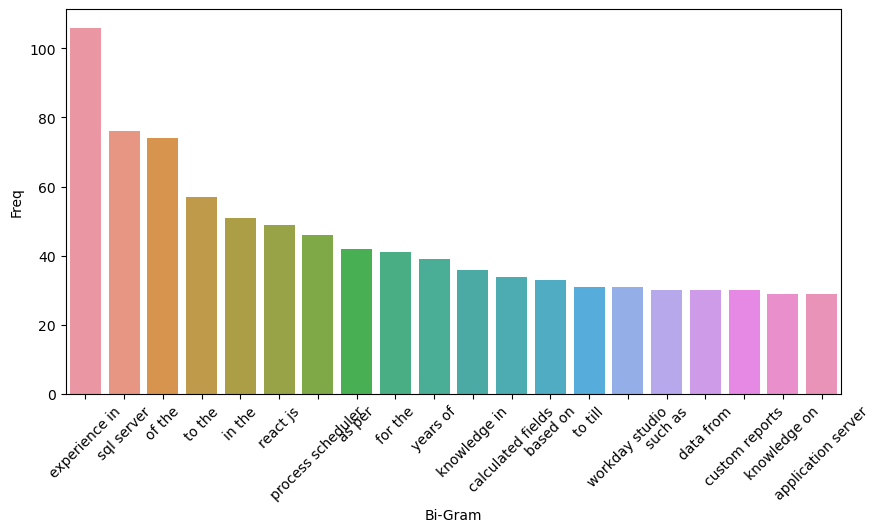

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns
top_20 = top_df.iloc[:20,:]
fig=plt.figure(figsize=(10,5))
plot=sns.barplot(x=top_20["Bi-Gram"],y=top_20["Freq"])
plot.set_xticklabels(rotation=45, labels=top_20["Bi-Gram"])

In [250]:
def get_top_3(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bow = vec1.transform(corpus)
    wsum = bow.sum(axis=0)
    freq = [(word, wsum[0, idx]) for word, idx in vec1.vocabulary_.items()]
    freq = sorted(freq, key = lambda x: x[1], reverse=True)
    return freq[:n]

In [251]:
top_200_3 = get_top_3(t6["data"], n=200)
top_df_3 = pd.DataFrame(top_200_3)
top_df_3.columns=["Bi-Gram","Freq"]
top_df_3.head()

,Bi-Gram,Freq
0,years of experience,26
1,of experience in,24
2,best of my,22
3,hereby declare that,21
4,as well as,19


[Text(0, 0, 'years of experience'),
 Text(1, 0, 'of experience in'),
 Text(2, 0, 'best of my'),
 Text(3, 0, 'hereby declare that'),
 Text(4, 0, 'as well as'),
 Text(5, 0, 'as per the'),
 Text(6, 0, 'process scheduler servers'),
 Text(7, 0, 'and process scheduler'),
 Text(8, 0, 'of application server'),
 Text(9, 0, 'application server domains'),
 Text(10, 0, 'to the best'),
 Text(11, 0, 'the best of'),
 Text(12, 0, 'of my knowledge'),
 Text(13, 0, 'good knowledge in'),
 Text(14, 0, 'true to the'),
 Text(15, 0, 'declare that the'),
 Text(16, 0, 'on experience in'),
 Text(17, 0, 'declare that all'),
 Text(18, 0, 'application servers web'),
 Text(19, 0, 'server domains process')]

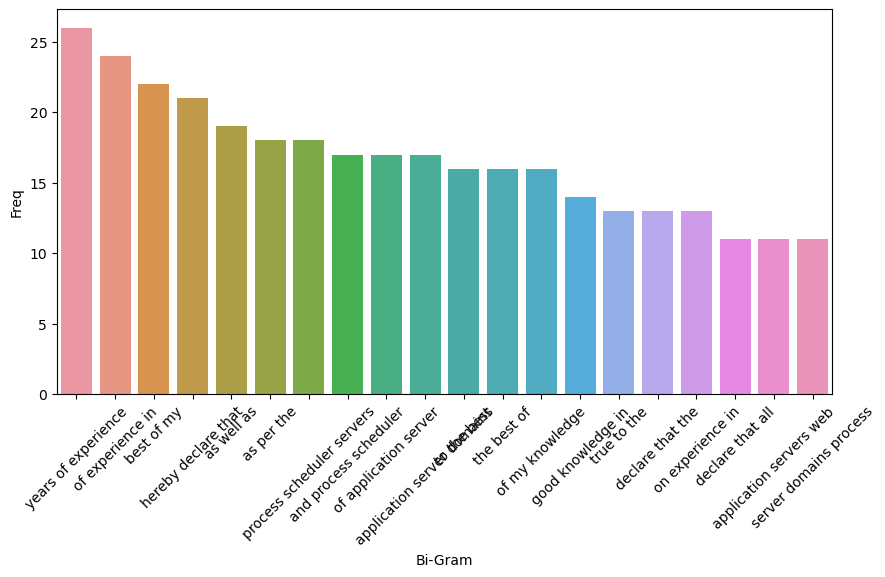

In [252]:
top_20_3 = top_df_3.iloc[:20,:]
fig=plt.figure(figsize=(10,5))
plot=sns.barplot(x=top_20_3["Bi-Gram"],y=top_20_3["Freq"])
plot.set_xticklabels(rotation=45, labels=top_20_3["Bi-Gram"])

### WordCloud

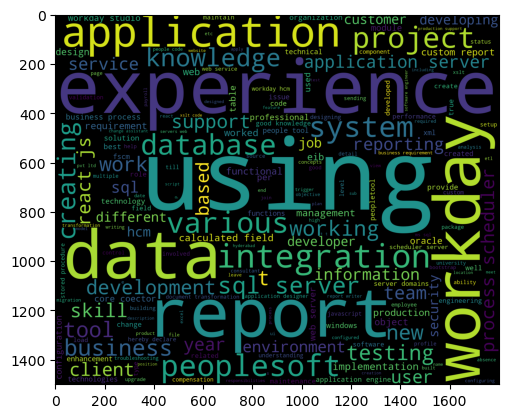

In [253]:
from wordcloud import WordCloud
from textblob import TextBlob

string_total = " ".join(t6["data"])
clouds = WordCloud(background_color="black",width=1800, height=1500).generate(string_total)
plt.imshow(clouds)

In [254]:
t6["Category"].unique()

array(['React Developer', 'PeopleSoft', 'SQL Developer', 'Workday'],
      dtype=object)

In [255]:
cat = {"React Developer":1, "PeopleSoft":2, "SQL Developer":3, "Workday":4}

t6["Cat"] = t6["Category"]


In [256]:
t6["Cat"].replace("React Developer",1,inplace=True)
t6["Cat"].replace("PeopleSoft",2,inplace=True)
t6["Cat"].replace("SQL Developer",3,inplace=True)
t6["Cat"].replace("Workday",4,inplace=True)
t6

,data,Category,File,name,text,Cat
0,name ravali p ...,React Developer,Internship_Ravali_Musquare Technologies (1).docx,Ravali,,1
1,susovan bag seeking a challenging positi...,React Developer,Internship_Susovan Bag_Musquare Technologies.docx,Susovan Bag,,1
2,kanumuru deepak reddytcareer objectiveto secur...,React Developer,React Developer_Deepakreddy.docx,Deepakreddy,,1
3,haripriya battina experience as ui developer i...,React Developer,React Developer_Haripriya.docx,Haripriya,,1
4,kamalakar reddy a linked in professional summ...,React Developer,React Developer_Kamalakar Reddy.docx,Kamalakar Reddy,,1
5,naveen sadhutitle software developertttt ...,React Developer,React Developer_Naveen sadhu.docx,Naveen sadhu,,1
6,pragnya pattnaik expertise having around yea...,React Developer,React Developer_Pragnya.docx,Pragnya,,1
7,bsarala madasusarala geethika prestigeroad n...,React Developer,React Developer_Sarala Madasu-converted.docx,Sarala Madasu,,1
8,bthirupathamma year of it experience as react...,React Developer,React Developer_Thirupathiamma.docx,Thirupathiamma,,1
9,uideveloper react js developer name krishna pr...,React Developer,React Dev_Krishna Kanth.docx,Krishna Kanth,,1


In [257]:
df["Cat"] = t6["Cat"]
df

,ability,absence,academic,acceptable,acceptance,access,accessibility,according,account,accounting,...,workflows,workshop,world,writer,writing,written,xml,xslt,year,Cat
0,0.000000,0.000000,0.062704,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.109410,1
1,0.000000,0.000000,0.112337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072024,0.000000,0.000000,...,0.000000,0.000000,0.076806,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.182016,0.000000,0.000000,0.000000,0.000000,0.000000,0.070416,1
4,0.056474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
5,0.193001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.121765,1
6,0.096282,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.073620,0.000000,0.000000,0.000000,1
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.091344,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
8,0.090251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.113878,1
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068685,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098597,0.000000,0.000000,1


In [264]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, scale
from scipy import stats

X = df.iloc[:,1:1000]
Y = df.iloc[:,1000]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
y_pred

array([2, 4, 1, 4, 3, 4, 3, 1, 3, 1, 1, 2, 2, 1, 1, 4], dtype=int64)

In [265]:
score = accuracy_score(y_pred, Y_test)
score

1.0

In [279]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
import scipy.stats as stats

X = df.iloc[:,1:1000]
Y = df.iloc[:,1000]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
gm = GaussianNB()
pred_y = gm.fit(X_train, Y_train).predict(X_train)
pred_y

array([2, 4, 3, 3, 4, 1, 4, 2, 1, 4, 2, 2, 1, 3, 1, 2, 2, 4, 3, 1, 2, 2,
       1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3], dtype=int64)

In [280]:
acc = accuracy_score(Y_train, pred_y)
print("Accuracy score on the training data is ", acc)
pred_y_test = gm.predict(X_test)
acc1 = accuracy_score(Y_test, pred_y_test)
print("Accuracy score on the testing data is ", acc1)

Accuracy score on the training data is  1.0
Accuracy score on the testing data is  0.875


In [281]:
np.logspace(0,-13, num=14)
cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)
cv_method

RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999)

In [282]:
params = {"var_smoothing": np.logspace(0,13,num=100)}
params

{'var_smoothing': array([1.00000000e+00, 1.35304777e+00, 1.83073828e+00, 2.47707636e+00,
        3.35160265e+00, 4.53487851e+00, 6.13590727e+00, 8.30217568e+00,
        1.12332403e+01, 1.51991108e+01, 2.05651231e+01, 2.78255940e+01,
        3.76493581e+01, 5.09413801e+01, 6.89261210e+01, 9.32603347e+01,
        1.26185688e+02, 1.70735265e+02, 2.31012970e+02, 3.12571585e+02,
        4.22924287e+02, 5.72236766e+02, 7.74263683e+02, 1.04761575e+03,
        1.41747416e+03, 1.91791026e+03, 2.59502421e+03, 3.51119173e+03,
        4.75081016e+03, 6.42807312e+03, 8.69749003e+03, 1.17681195e+04,
        1.59228279e+04, 2.15443469e+04, 2.91505306e+04, 3.94420606e+04,
        5.33669923e+04, 7.22080902e+04, 9.77009957e+04, 1.32194115e+05,
        1.78864953e+05, 2.42012826e+05, 3.27454916e+05, 4.43062146e+05,
        5.99484250e+05, 8.11130831e+05, 1.09749877e+06, 1.48496826e+06,
        2.00923300e+06, 2.71858824e+06, 3.67837977e+06, 4.97702356e+06,
        6.73415066e+06, 9.11162756e+06, 1.23284

In [283]:
gs = GridSearchCV(estimator=gm, param_grid=params, cv=cv_method, verbose=1, scoring="accuracy")
gs

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 1.35304777e+00, 1.83073828e+00, 2.47707636e+00,
       3.35160265e+00, 4.53487851e+00, 6.13590727e+00, 8.30217568e+00,
       1.12332403e+01, 1.51991108e+01, 2.05651231e+01, 2.78255940e+01,
       3.76493581e+01, 5.09413801e+01, 6...
       9.54548457e+09, 1.29154967e+10, 1.74752840e+10, 2.36448941e+10,
       3.19926714e+10, 4.32876128e+10, 5.85702082e+10, 7.92482898e+10,
       1.07226722e+11, 1.45082878e+11, 1.96304065e+11, 2.65608778e+11,
       3.59381366e+11, 4.86260158e+11, 6.57933225e+11, 8.90215085e+11,
       1.20450354e+12, 1.62975083e+12, 2.20513074e+12, 2.98364724e+12,
       4.03701726e+12, 5.46227722e+12, 7.39072203e+12, 1.00000000e+13])},
             scoring='accuracy', verbose=1)

In [284]:
transform = PowerTransformer().fit_transform(X_test)
transform

array([[-0.37796394, -0.25819889, -0.25819889, ..., -0.48037825,
        -0.47967054, -0.37796435],
       [-0.37796394, -0.25819889, -0.25819889, ..., -0.48037825,
        -0.47967054, -0.37796435],
       [ 2.65047751, -0.25819889, -0.25819889, ...,  2.07774385,
         2.17059772, -0.37796435],
       ...,
       [-0.37796394, -0.25819889, -0.25819889, ..., -0.48037825,
         1.90061629, -0.37796435],
       [-0.37796394, -0.25819889,  3.87298335, ..., -0.48037825,
        -0.47967054, -0.37796435],
       [-0.37796394, -0.25819889, -0.25819889, ..., -0.48037825,
        -0.47967054, -0.37796435]])

In [285]:
result = pd.DataFrame(gs.cv_results_['params'])

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [278]:
gs.

In [289]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [291]:
clf = SVC()
param_grid = [{'kernel':['rbf','linear','poly','sigmoid'],'gamma':[50, 5, 10, 0.5],'C':[1000,500,100,50,15,14,13,12,11,1,0.1,0.01,0.001]}]
gsv = GridSearchCV(clf, param_grid, cv=10)
gsv.fit(X_train, y_train)

C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1000, 500, 100, 50, 15, 14, 13, 12, 11, 1, 0.1,
                                0.01, 0.001],
                          'gamma': [50, 5, 10, 0.5],
                          'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}])

In [292]:
gsv.best_params_, gsv.best_score_

({'C': 1000, 'gamma': 50, 'kernel': 'linear'}, 1.0)

In [293]:
clf = SVC(C=1000, kernel='linear', gamma=50)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy score is {acc}")

Accuracy score is 100.0


In [294]:
confusion_matrix(y_test, y_pred)

array([[9, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 4]], dtype=int64)

In [314]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, roc_auc_score,classification_report


In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

In [298]:
params = [{"criterion": ["gini", "entropy"], "max_depth" : [10, 20], "n_estimators" : [10, 200], "max_features": ["sqrt", 0.3]}]

rnd = RandomForestClassifier()
clf = GridSearchCV(rnd, params, cv=7, scoring="roc_auc")
clf.fit(X_train, y_train)

C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=7.
  warnings.warn(
C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not s

C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these pa

C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these pa

C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these pa

C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these pa

C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these pa

C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these pa

C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these pa

C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\marang\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these pa

GridSearchCV(cv=7, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [10, 20], 'max_features': ['sqrt', 0.3],
                          'n_estimators': [10, 200]}],
             scoring='roc_auc')

In [302]:
clf.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=10)

In [303]:
clf.best_score_

nan

In [305]:
kfold = KFold(10)
accuracy = []
for i in range(1, 201):
    forest = RandomForestClassifier(random_state=42, n_estimators= i)
    result = cross_val_score(forest, X, y, cv = kfold)
    accuracy.append(np.mean(result))

In [306]:
ideal = accuracy.index(max(accuracy))
ideal

27

In [307]:
forest = RandomForestClassifier(n_estimators= ideal, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=27, random_state=42)

In [308]:
num_trees = 7
max_features = 0.3
clf_rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, max_depth=10, random_state=42)
clf_rf.fit(X_train, y_train)
results = cross_val_score(clf_rf, X, y, cv=10)
print(results.mean())

0.9833333333333334


In [316]:
y_pred = pd.DataFrame(clf_rf.predict(X_test))

In [315]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00         2
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         3

    accuracy                           0.94        16
   macro avg       0.96      0.95      0.95        16
weighted avg       0.95      0.94      0.94        16

